## Online Pharmacy Customer Segmentation 
## Using K-means and PCA
Customer Segmentation for Better Marketing

### 1.What is Customer Segmentation?
### 2.Business Case
### 3.Data Exploration and Understanding
### 4.Data Preprocessing
### 5.Modelling
#### -K-Means for Segmentation
#### -PCA with K-Means for better visualization
### 6.Conclusion

Imagine you bought health supplement X from an online pharmacy store; have you stopped to ask who else might have bought a similar product? You probaly share certain similar demographic characteristics i.e age and gender.Marketing departments of such stores ideally want to find 'your product' on other people.
You would ask how do they do that? With data definitely.
That basically is the long and short of customer segementation.
We seek to find common characteristics between customers so that we can effectively market to them.

## Business Case:
You are a data scientist for an online pharmacy store
The sales and marketing team would want to put out certain initiatives to their customers i.e special discounts,product pairing(buy one get one of another item free) and introduction of new products into the market.
You have been tasked to conduct a customer segmentation analysis that will enable the marketing team do this effectively; the purpose of this is to save time and resources deployed. Since the messging is to be tailored to specific customers.

In [148]:
#We will require certain tools
#Import required libraries

#Data Manipulation Libraries
import numpy as np
import pandas as pd

#Data Viz Libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() #Styling 

#Modelling Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [149]:
#Loading the data;exploring and understanding the data
df=pd.read_csv('segmentation data.csv',index_col=0)

In [150]:
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0


In [151]:
#we have loaded our dataset
#It has 2000 rows and 8 columns
#Id=unique customer identifier
#Sex-gender; 0-male;1-female
#Marital Status; 0-single;1-not singe(divored/married/widowed)
#Age;Age of the customer; current year-D.o.B;18-76 years
#Education; level of education;0-unknown;1-high school; 2-university;3-graduate school
#Income; self declared income lowest and highest values
#Occupation;0-unemployed/unskilled;1-skilled/official employed;2-management
#Settlement Size;0-small town;1-mid sized city;2-big city

In [152]:
#Data Exploration

In [153]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [154]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [155]:
df.isna()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,False,False,False,False,False,False,False
100000002,False,False,False,False,False,False,False
100000003,False,False,False,False,False,False,False
100000004,False,False,False,False,False,False,False
100000005,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
100001996,False,False,False,False,False,False,False
100001997,False,False,False,False,False,False,False
100001998,False,False,False,False,False,False,False


In [156]:
df.isnull()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,False,False,False,False,False,False,False
100000002,False,False,False,False,False,False,False
100000003,False,False,False,False,False,False,False
100000004,False,False,False,False,False,False,False
100000005,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
100001996,False,False,False,False,False,False,False
100001997,False,False,False,False,False,False,False
100001998,False,False,False,False,False,False,False


In [157]:
#Mean age is 35.90 years
#Mean income is 120954.419

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


In [159]:
#Information about the dataframe and the datatypes,columns,non-null values.
#No missing values
#All variables are integers

In [160]:
#We will then seek to understand the relationship between the variables
#We will use the correlation function in the pandas library.
df.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


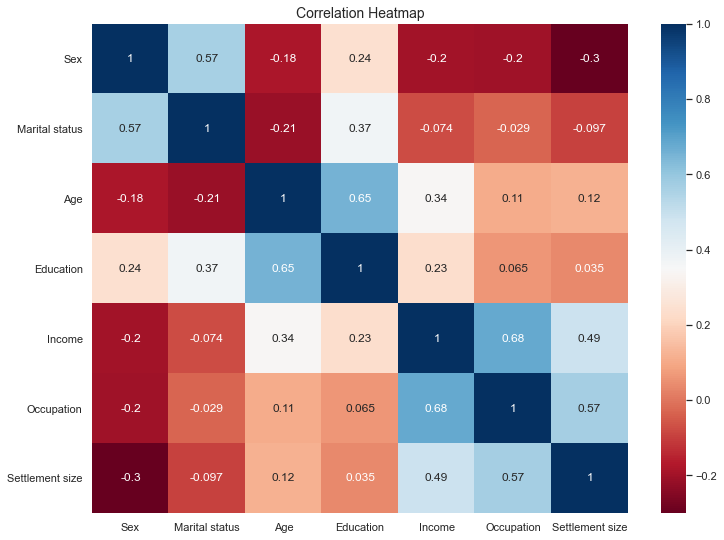

<Figure size 432x288 with 0 Axes>

In [161]:
#Correlation Matrix
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True,cmap='RdBu')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation=0)
plt.show()
plt.savefig('Correlation Heatmap')

In [162]:
#Strong correlation between education and Age; is strong; Older people are highly educated
#Income and occupation;higher salary-higher level of occupation


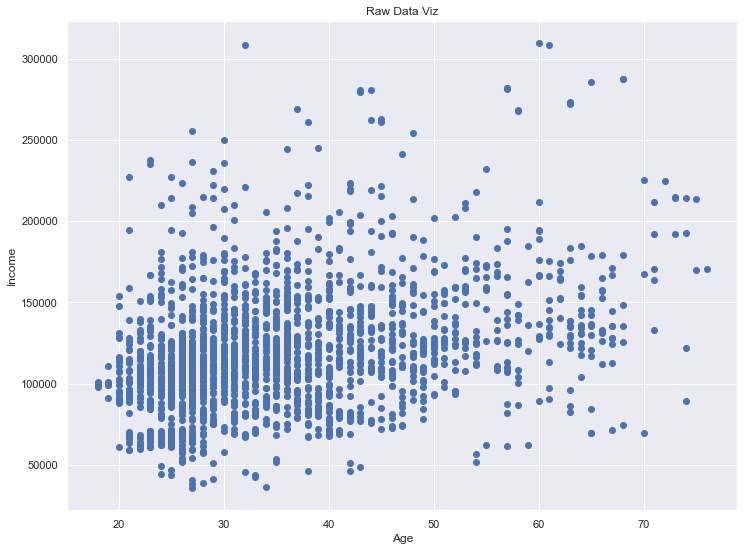

In [163]:
#Visualize the raw data
#2000 data points scattered across age and income at pos 2 and 4 in the dataset
plt.figure(figsize=(12,9))
plt.scatter(df.iloc[:,2],df.iloc[:,4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Raw Data Viz')
plt.savefig('Raw Data Viz Plot')

In [164]:
#Segmentation
#We scale the data first

K-means is a distance based machine learning model
To effectively use it we need to apply standardization on to our features. Which is treating them equally to ensure their values range from [0:1]

In [165]:
#standardization
scaler=StandardScaler()
df_std=scaler.fit_transform(df)

In [186]:
 df_std=pd.DataFrame(data=df_std,columns=df.columns)

In [167]:
#We need to select clusters
#How?
#2 methods WCSS(within cluster sum squared) and Elbow

In [168]:
#WCSS
#10 clusters will be considered and we will run it from different starting point
wcss = []
for i in range(2,12):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)


In [169]:
#each value was stored to the WCSS list
#now to visualize

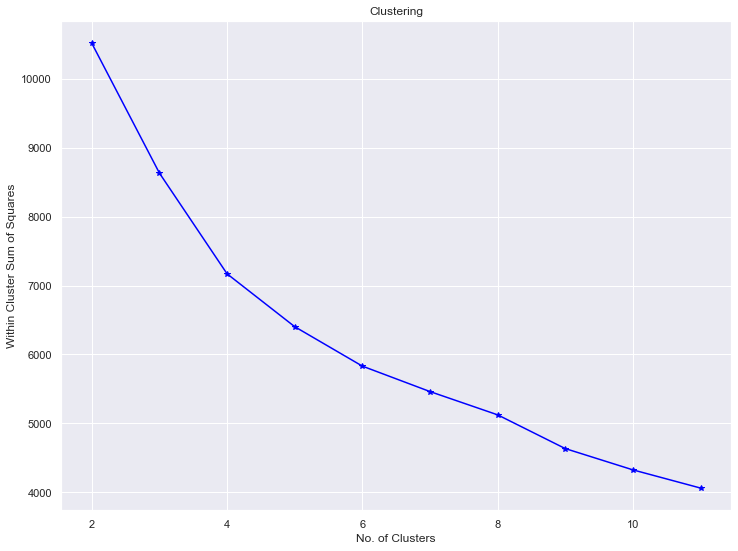

<Figure size 432x288 with 0 Axes>

In [170]:
plt.figure(figsize=(12,9))
plt.plot(range(2,12),wcss,marker='*',linestyle='-',color='blue')
plt.xlabel('No. of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.title('Clustering')
plt.show()
plt.savefig('Clustering in K-means')

In [171]:
#Looking at the graph-elbow is the 4 cluster mark
#It is the point where the graph steeply declines and smoothes afterwards
#we will proceed to perform K-means with 4 clusters


In [172]:
kmeans=KMeans(n_clusters=4,init='random',random_state=42)

In [173]:
kmeans.fit(df_std)

KMeans(init='random', n_clusters=4, random_state=42)

In [174]:
#create a new df with the original vars and add the Segment K-means Column.

In [175]:
df_segmented=df_std.copy()
df_segmented=pd.DataFrame(data = df_std,columns = df.columns)
df_std['Segment_K_Means']=kmeans.labels_

In [176]:
df_segmented

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment_K_Means
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,0
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,1
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,2
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,3
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,3
...,...,...,...,...,...,...,...,...
1995,1.090038,-0.993024,0.946616,-0.063372,0.067471,-1.269525,-0.909730,2
1996,1.090038,1.007025,-0.760382,-0.063372,-0.084265,0.296823,-0.909730,1
1997,-0.917399,-0.993024,-0.418983,-1.731068,-0.906957,-1.269525,-0.909730,2
1998,1.090038,1.007025,-1.016432,-0.063372,-0.603329,-1.269525,-0.909730,1


In [177]:
#explain the clusters

In [178]:
#mean value for the clusters
df_segmented_analysis=df_segmented.groupby(['Segment_K_Means']).mean()
df_segmented_analysis.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment_K_Means,,,,,,,
0,0.090136,0.391040,1.689452,1.819919,0.981226,0.499317,0.457039
1,0.796753,1.001351,-0.592830,0.050173,-0.398834,-0.276394,-0.389380
2,-0.209147,-0.954062,-0.028257,-0.485711,-0.606168,-0.754190,-0.856438
3,-0.857528,-0.645647,-0.023378,-0.508091,0.531869,0.722760,0.964888


In [179]:
df_segmented_analysis.rename({0:'well-off',
                         1:'fewer-opportunities',
                         2:'standard',
                         3:'career focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment_K_Means,,,,,,,
well-off,0.090136,0.391040,1.689452,1.819919,0.981226,0.499317,0.457039
fewer-opportunities,0.796753,1.001351,-0.592830,0.050173,-0.398834,-0.276394,-0.389380
standard,-0.209147,-0.954062,-0.028257,-0.485711,-0.606168,-0.754190,-0.856438
career focused,-0.857528,-0.645647,-0.023378,-0.508091,0.531869,0.722760,0.964888


In [180]:
#we will then add the labels of the segmanets to our table
df_segmented['Labels']= df_segmented['Segment_K_Means'].map({0:'well-off',1:'fewer opportunities',2:'standard',3:'career focussed'})

In [181]:
df_segmented.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment_K_Means,Labels
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,0,well-off
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,1,fewer opportunities
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,2,standard
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,3,career focussed
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,3,career focussed


In [182]:
#plotting the requirements from the K-Means Algorithm
#Each data point is plotted with colors to show clusters it has been assigned.

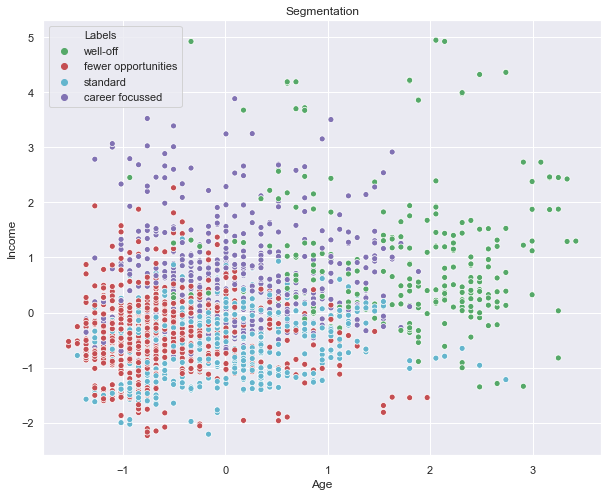

<Figure size 432x288 with 0 Axes>

In [183]:
x_axis=df_segmented['Age']
y_axis=df_segmented['Income']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_segmented['Labels'],palette=['g','r','c','m'])
plt.title('Segmentation')
plt.show()
plt.savefig('Segmentation')

In [184]:
#Principal Component Anlysis
#We used PCA to find subset of the components; this explains the variance in the data
pca=PCA()

In [187]:
pca.fit(df_std)

PCA()

In [188]:
pca.explained_variance_ratio_
#this shows how the variance is explained by the seven individual components


array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

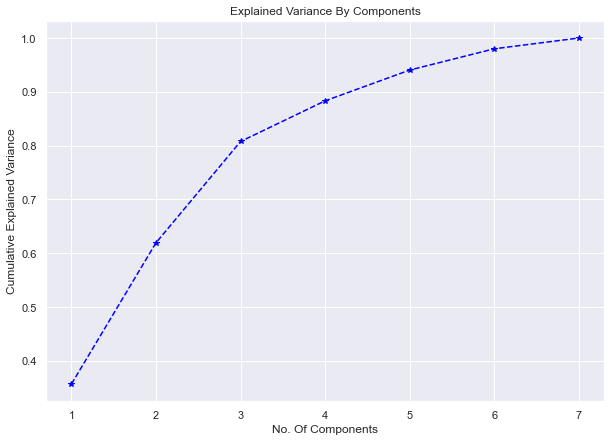

In [198]:
#proceed to plot variance shown by the number of components
#we will keep 80% of the explained variance
plt.figure(figsize=(10,7))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(),marker='*',linestyle='--',color='blue')
plt.title('Explained Variance By Components')
plt.xlabel('No. Of Components')
plt.ylabel('Cumulative Explained Variance')
plt.savefig('Cumulative Varience By Components')

In [199]:
#as per the graph we pick 4 components
pca=PCA(n_components=4)

In [200]:
pca.fit(df_std)

PCA(n_components=4)

## PCA Outcomes

In [201]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503],
       [-0.31560091,  0.28045392, -0.00950602,  0.18147643, -0.48260023,
        -0.28169039,  0.69026455]])

In [205]:
df_pca_components=pd.DataFrame(data=pca.components_,columns=df.columns,index=['Component 1','Component 2','Component 3','Component 4'])

In [206]:
df_pca_components

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685
Component 4,-0.315601,0.280454,-0.009506,0.181476,-0.482600,-0.281690,0.690265


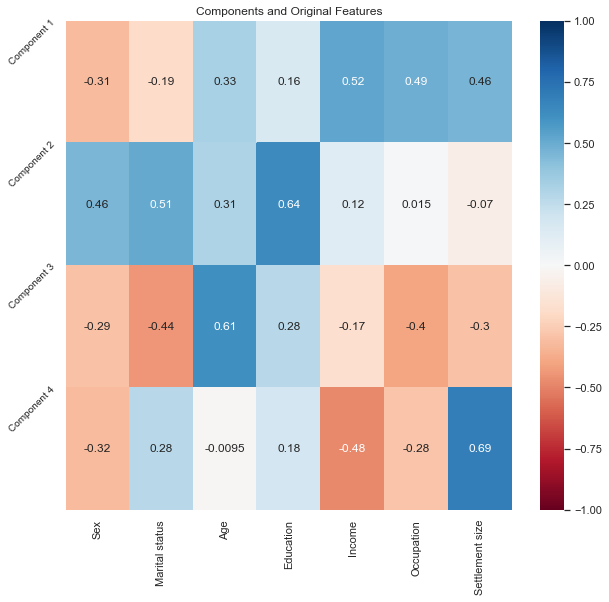

<Figure size 432x288 with 0 Axes>

In [207]:
plt.figure(figsize=(10,9))
sns.heatmap(df_pca_components,vmin=-1,vmax=1,cmap='RdBu',annot=True)
plt.yticks([0,1,2,3],['Component 1','Component 2','Component 3','Component 4'],rotation=45,fontsize=10)
plt.title('Components and Original Features')
plt.show()
plt.savefig('Components and Original Features')

In [208]:
pca.transform(df_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ,  1.21779432],
       [ 0.34493528,  0.59814564, -2.21160279,  0.54838542],
       [-0.65106267, -0.68009318,  2.2804186 ,  0.12067518],
       ...,
       [-1.45229829, -2.23593665,  0.89657125, -0.13177412],
       [-2.24145254,  0.62710847, -0.53045631, -0.04260559],
       [-1.86688505, -2.45467234,  0.66262172,  0.10089556]])

In [209]:
score_pca=pca.transform(df_std)

### Clustering With Principal Component Analysis

In [211]:
#After transforming the data with pca we proceed to fi k-means algorithm
wcss=[]
for i in range (2,12):
    kmeans_pca=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans_pca.fit(score_pca)
    wcss.append(kmeans_pca.inertia_)

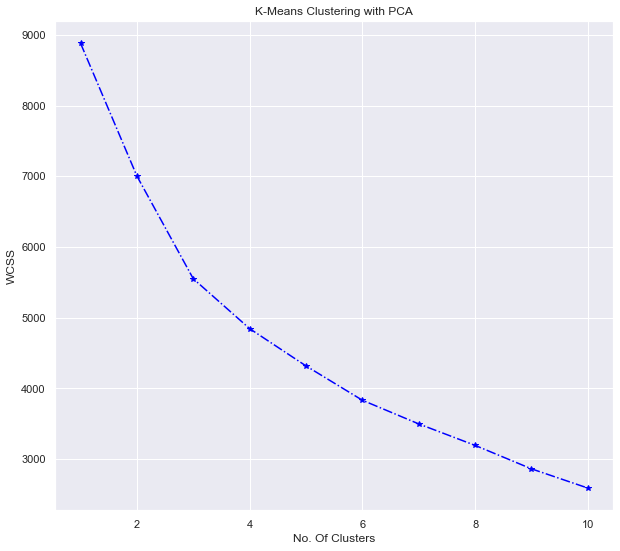

<Figure size 432x288 with 0 Axes>

In [214]:
#plot with the PCA results in mind
#this plot helps us to decide what clusters
plt.figure(figsize=(10,9))
plt.plot(range(1,11),wcss,marker='*',linestyle='-.',color='blue')
plt.xlabel('No. Of Clusters')
plt.ylabel('WCSS')
plt.title('K-Means Clustering with PCA')
plt.show()
plt.savefig('K-Means Clustering with PCA')

In [215]:
#the kink at 4 clusters
#we run the k-means with 4 clusters
kmeans_pca=KMeans(n_clusters=4,init='k-means++',random_state=42)

In [217]:
kmeans_pca.fit(score_pca)

KMeans(n_clusters=4, random_state=42)

In [224]:
#proceed to create a new dataframe with original features,pca scores and clusters
df_segmented_pca_kmeans=pd.concat([df.reset_index(drop=True),pd.DataFrame(score_pca)],axis=1)
df_segmented_pca_kmeans.columns.values[-4: ]=['Component 1','Component 2','Component 3','Component 4']
df_segmented_pca_kmeans['Segmented K-means PCA']=kmeans_pca.labels_

In [225]:
df_segmented_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Component 4,Segmented K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,1.217794,0
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0.548385,3
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0.120675,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,-0.510753,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,-0.231808,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,-0.945916,2
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,-0.736766,3
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,-0.131774,2
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,-0.042606,3


In [227]:
#compute the mean by segments
df_segmented_pca_kmeans_frequency=df_segmented_pca_kmeans.groupby(['Segmented K-means PCA']).mean()
df_segmented_pca_kmeans_frequency

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Component 4
Segmented K-means PCA,,,,,,,,,,,
0,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953,0.093869
1,0.026178,0.178010,35.624782,0.734729,140950.319372,1.267016,1.520070,1.381089,-1.044848,-0.273292,0.211736
2,0.319018,0.089980,35.259714,0.768916,95850.155419,0.296524,0.038855,-0.987777,-0.882022,0.965476,-0.271684
3,0.905045,0.986647,28.873887,1.063798,107576.228487,0.672107,0.439169,-1.122432,0.733291,-0.797918,-0.019662


In [228]:
#cluster size and its proportion to the entire dataset
df_segmented_pca_kmeans_frequency['No of Observations']=df_segmented_pca_kmeans[['Segmented K-means PCA','Sex']].groupby(['Segmented K-means PCA']).count()
df_segmented_pca_kmeans_frequency['Proportion of Observations']=df_segmented_pca_kmeans_frequency['No of Observations']/df_segmented_pca_kmeans_frequency['No of Observations'].sum()
df_segmented_pca_kmeans_frequency=df_segmented_pca_kmeans_frequency.rename({0:'standard',
1:'career-focused',
2:'fewer opportunities',
3:'well-off'})
df_segmented_pca_kmeans_frequency

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Component 4,No of Observations,Proportion of Observations
Segmented K-means PCA,,,,,,,,,,,,,
standard,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953,0.093869,264,0.1320
career-focused,0.026178,0.178010,35.624782,0.734729,140950.319372,1.267016,1.520070,1.381089,-1.044848,-0.273292,0.211736,573,0.2865
fewer opportunities,0.319018,0.089980,35.259714,0.768916,95850.155419,0.296524,0.038855,-0.987777,-0.882022,0.965476,-0.271684,489,0.2445
well-off,0.905045,0.986647,28.873887,1.063798,107576.228487,0.672107,0.439169,-1.122432,0.733291,-0.797918,-0.019662,674,0.3370


In [229]:
df_segmented_pca_kmeans['Legend']=df_segmented_pca_kmeans['Segmented K-means PCA'].map({0:'standard',1:'career focused',2:'fewer opportunites',3:'well-off'})

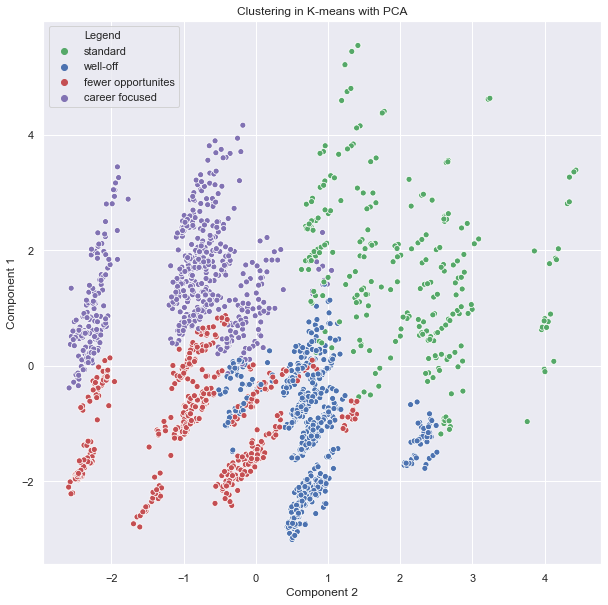

<Figure size 432x288 with 0 Axes>

In [231]:
#we proceed to plot the data with the PCA components
#x axis componet 2 and y axis componet 1
x_axis=df_segmented_pca_kmeans['Component 2']
y_axis=df_segmented_pca_kmeans['Component 1']
plt.figure(figsize=(10,10))
sns.scatterplot(x_axis,y_axis,hue=df_segmented_pca_kmeans['Legend'],palette=['g','b','r','m'])
plt.title('Clustering in K-means with PCA')
plt.show()
plt.savefig('Clustering in K-means with PCA')